# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient develops coronary heart disease (CHD) within a 10-year period.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

You can read more about the data and the variables [here](https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression).

In [2]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc


import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [10]:
# Question 1 code here
df = pd.read_csv('framingham.csv').dropna()
# For this assignment, we are dropping any rows that have missing data.
# THIS IS GENERALLY A BAD IDEA. We will discuss alternatives later in the course.

# Code below to display first 5 rows
print('First 5 rows:')
print(df.head())

First 5 rows:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1   

## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the official assignment solution.

In [8]:
# Question 2 code here.

# Don't use the "TenYearCHD" as a feature
X = df.drop('TenYearCHD', axis='columns')
y = df.TenYearCHD.values
# Splitting code here
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.50, random_state=0)

print('TenYearCHD_Y in train set: {}'.format((ytrain==1).sum()))
print('TenYearCHD_Y in test set: {}'.format((ytest==1).sum()))

TenYearCHD_Y in train set: 267
TenYearCHD_Y in test set: 290


## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes, by default, LogisticRegression in sklearn uses L2 penalty which penalizes large coefficients to prevent overfitting.
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** When a penalty is applied during learning, the coefficients are generally smaller because the regularization term discourages large values. Without a penalty, the coefficients can be larger and more prone to overfitting, especially if the model fits noise in the data.
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** No, you should not include a column of 1s in your design matrix because sklearn's LogisticRegression automatically includes an intercept term (bias) in the model, so adding a column of 1s would result in redundant intercept.

## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.

Using this object, **run a logisitic regression analysis** of `TenYearCHD` (y-variable) against `totChol` (x-variable) using your training data. 

Then **make a plot with three main components based on the analysis**:
1. Scatter-plot of `totChol` and `TenYearCHD` on your test data
2. A curve showing the prediction (0 or 1, using `predict` - this curve will jump between 0 and 1) as a function of `totChol`
3. A curve showing the predicted probability of a positive outcome (using `predict_proba`) as a function of `totChol`. Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1) in an array.

Intercept: [-3.00731819], Coefficient: [[0.00519351]]


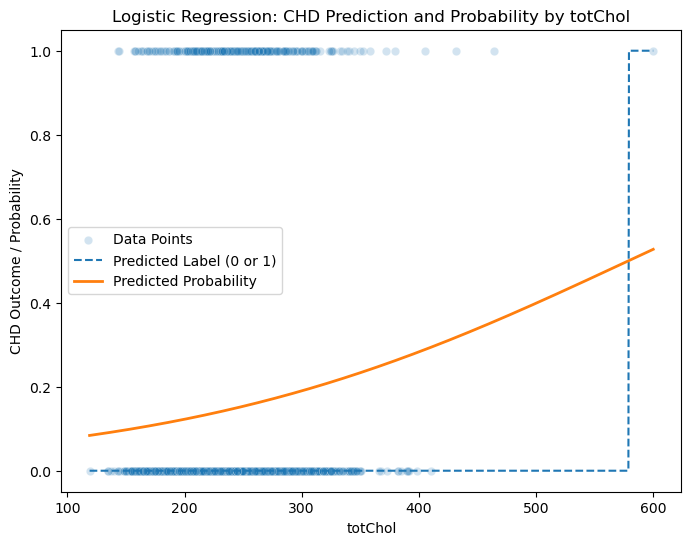

In [51]:
# Question 4 code here.
# Assign appropriate values to xscatter, yscatter (x and y coordinates for scatter plot)
# xline (x coordinates for plot of prediction)
# yline_label (y coordinates for plot of predicted label)
# yline_prob (y coordinates for plot of predicted probability)

# YOUR CODE HERE
classifier_lreg = LogisticRegression(penalty=None, max_iter=1000)
classifier_lreg.fit(Xtrain[['totChol']], ytrain)
print('Intercept: {}, Coefficient: {}'.format(classifier_lreg.intercept_, classifier_lreg.coef_))
xscatter = Xtest['totChol']
yscatter = ytest
xline = np.linspace(Xtest['totChol'].min(), Xtest['totChol'].max(), 1000)
xline_df = pd.DataFrame(xline, columns=['totChol'])
yline_label = classifier_lreg.predict(xline_df)
yline_prob = classifier_lreg.predict_proba(xline_df)[:, 1]
plt.figure(figsize=(8, 6))

# Plotting code provided
# xscatter, yscatter, xline, yline1, yline2 must all be 1D arrays
ax = sns.scatterplot(x=xscatter,y=yscatter,alpha=0.2, label='Data Points') #Plot data
sns.lineplot(x=xline,y=yline_label, label='Predicted Label (0 or 1)', linestyle='--') # Plot line indicating label
sns.lineplot(x=xline,y=yline_prob, label='Predicted Probability', linewidth=2) # Plot line indicating probability

plt.xlabel('totChol')
plt.ylabel('CHD Outcome / Probability')
plt.title('Logistic Regression: CHD Prediction and Probability by totChol')
plt.legend()
plt.show()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your totChol-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** tp + fp = 1 + 0 = 1

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:** The classifier labeled the instance as positive because its predicted probability of developing CHD was approximately 0.527 which is greater than the threshold of 0.5.

* Is this classifier useful for finding specific individuals who will develop CHD? Explain in one or two sentences.

**YOUR ANSWER HERE:** This classifier has limited utility for identifying individuals who will develop CHD, as evidenced by a recall of only 0.003, meaning it correctly identified only 0.3% of actual positive cases. Although it labeled one instance with a total cholesterol of 600.0 as positive with a predicted probability of approximately 0.527, the high number of false negatives (289) indicates that it fails to effectively predict most individuals at risk.

In [73]:
# Calculate performance measures from scratch - provided function
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))

## Put code here to compute criteria:

# Predict probabilities on the test data
ytest_prob = classifier_lreg.predict_proba(Xtest[['totChol']])[:, 1]
# Generate predicted labels based on the threshold of 0.5
yhat_thresholded = (ytest_prob >= 0.5).astype(int)
# Count how many test instances are labeled positive by the classifier
num_positive_labels = sum(yhat_thresholded)
print('Number of positive instances labeled by the classifier: {}'.format(num_positive_labels))
# Calculate performance measures using the provided function
compute_performance(yhat_thresholded, ytest, classifier_lreg.classes_)

## Put code here to compute whatever else you might need to answer the question.
positive_indices = np.where(yhat_thresholded == 1)[0]
if len(positive_indices) > 0:
    positive_instance_index = positive_indices[0]
    positive_instance = Xtest.iloc[positive_instance_index]
    predicted_prob = ytest_prob[positive_instance_index]
    
    print(f"Positive instance (totChol): {positive_instance['totChol']}, Predicted Probability: {predicted_prob}")

Number of positive instances labeled by the classifier: 1
tp: 1 tn: 1538 fp: 0 fn: 289
Accuracy: 0.842 Recall: 0.003 Precision: 1.0 Sensitivity: 0.003 Specificity: 1.0
Positive instance (totChol): 600.0, Predicted Probability: 0.5271708614743891


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame (except for `TenYearCHD`) in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Age more strongly associated with CHD, if all other variables are held equal?

**YOUR ANSWER HERE:** Larger Age is more strongly associated with an increased likelihood of developing CHD, as indicated by the positive coefficient of 0.062342. This suggests that as age increases, the probability of developing CHD also increases, holding all other variables constant.

In [61]:
# Code for Question 6

# Fit the logistic regression model with all features except 'TenYearCHD'
classifier_full = LogisticRegression(penalty=None, max_iter=10000)
classifier_full.fit(Xtrain, ytrain)

print('Intercept:', classifier_full.intercept_)
print('Coefficients:', classifier_full.coef_)

# Create a DataFrame to view feature names with their corresponding coefficients
features = Xtrain.columns
coefficients_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': classifier_full.coef_[0]
})
print(coefficients_df)

Intercept: [-8.79157152]
Coefficients: [[ 5.26707108e-01  6.23422528e-02 -1.70236379e-03  7.88983003e-02
   1.54379171e-02  6.00243831e-01  1.02873002e+00  1.15144151e-01
  -3.45499130e-01  1.95759383e-03  1.70937896e-02 -1.63759817e-04
   1.00856896e-03 -3.56686583e-03  9.26461107e-03]]
            Feature  Coefficient
0              male     0.526707
1               age     0.062342
2         education    -0.001702
3     currentSmoker     0.078898
4        cigsPerDay     0.015438
5            BPMeds     0.600244
6   prevalentStroke     1.028730
7      prevalentHyp     0.115144
8          diabetes    -0.345499
9           totChol     0.001958
10            sysBP     0.017094
11            diaBP    -0.000164
12              BMI     0.001009
13        heartRate    -0.003567
14          glucose     0.009265


## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** 48 test instances are labeled positive by the classifier.

* Is this classifier **better or worse than the amount-only classifier** for finding individuals likely to develop CHD? Explain in one or two sentences.*

**YOUR ANSWER:** This classifier is worse than the amount-only classifier for finding individuals likely to develop CHD. Although it identified more positive cases, the recall is only 0.083, indicating that it missed a significant number of actual positive cases compared to the amount-only model.

In [74]:
# Code for Question 7

# Predict probabilities on the test data using the full model
ytest_prob_full = classifier_full.predict_proba(Xtest)[:, 1]
# Generate predicted labels based on the threshold of 0.5
yhat_thresholded_full = (ytest_prob_full >= 0.5).astype(int)
# Count how many test instances are labeled positive by the classifier
num_positive_labels_full = sum(yhat_thresholded_full)
print('Number of positive instances labeled by the classifier: {}'.format(num_positive_labels_full))

# Calculate performance measures using the provided function
compute_performance(yhat_thresholded_full, ytest, classifier_full.classes_)

## Put code here to compute whatever else you might need to answer the question.
positive_indices_full = np.where(yhat_thresholded_full == 1)[0]
if len(positive_indices_full) > 0:
    positive_instance_index_full = positive_indices_full[0]
    positive_instance_full = Xtest.iloc[positive_instance_index_full]
    predicted_prob_full = ytest_prob_full[positive_instance_index_full]
    
    print(f"Positive instance: {positive_instance_full}, Predicted Probability: {predicted_prob_full}")

# Compare with previous model's recall
previous_recall = 0.003  # This should be the recall value from the amount-only classifier
# Check if the new model is better or worse
if 'Recall' in locals() and recall > previous_recall:
    comparison = "better"
else:
    comparison = "worse"

# Output the comparison result
print(f"The new classifier is {comparison} than the amount-only classifier.")

Number of positive instances labeled by the classifier: 48
tp: 24 tn: 1514 fp: 24 fn: 266
Accuracy: 0.841 Recall: 0.083 Precision: 0.5 Sensitivity: 0.083 Specificity: 0.984
Positive instance: male                 1.00
age                 64.00
education            1.00
currentSmoker        1.00
cigsPerDay          15.00
BPMeds               1.00
prevalentStroke      0.00
prevalentHyp         1.00
diabetes             0.00
totChol            266.00
sysBP              191.00
diaBP               81.00
BMI                 25.33
heartRate           95.00
glucose             78.00
Name: 2007, dtype: float64, Predicted Probability: 0.7172570543237677
The new classifier is worse than the amount-only classifier.


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The classifier with all variables has a higher estimated probability of correctly distinguishing between a positive and a negative instance, as indicated by its higher AUC value compared to the totChol-only classifier. A higher AUC means the model has better performance in distinguishing between classes.

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** An AUROC less than 0.5 indicates that the classifier is making predictions worse than random chance. This could happen if the model is poorly specified, such as using irrelevant features, being overly simplistic, or having multicollinearity issues. It may also occur if the data is imbalanced, leading the model to favour one class excessively.

In [68]:
# ROC for totChol-only classifier

ytest_prob_totChol = classifier_lreg.predict_proba(Xtest[['totChol']])[:, 1]
fpr_totChol, tpr_totChol, _ = roc_curve(ytest, ytest_prob_totChol)
roc_auc_totChol = auc(fpr_totChol, tpr_totChol)

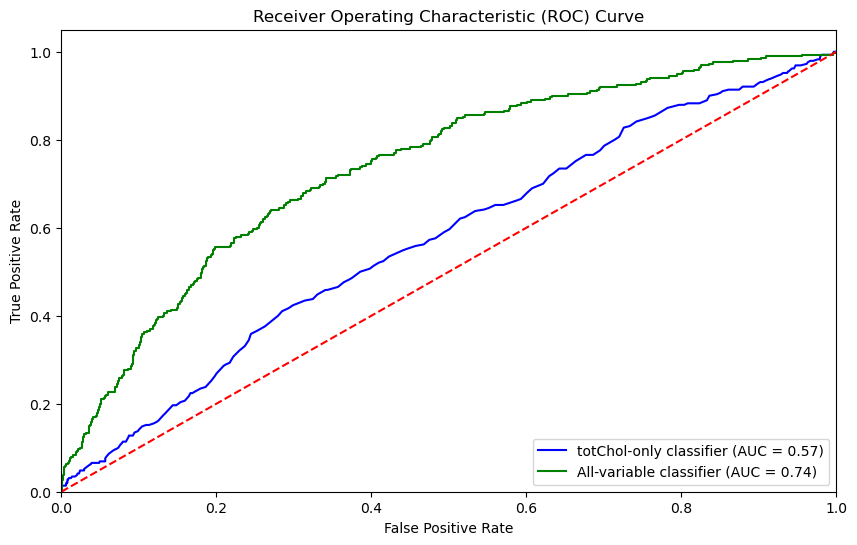

In [69]:
# ROC for all-variable classifier

ytest_prob_all = classifier_full.predict_proba(Xtest)[:, 1]
fpr_all, tpr_all, _ = roc_curve(ytest, ytest_prob_all)
roc_auc_all = auc(fpr_all, tpr_all)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_totChol, tpr_totChol, color='blue', label='totChol-only classifier (AUC = {:.2f})'.format(roc_auc_totChol))
plt.plot(fpr_all, tpr_all, color='green', label='All-variable classifier (AUC = {:.2f})'.format(roc_auc_all))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 20% of future CHD cases?

**YOUR ANSWER:** *The model with all variables has a precision of about 0.4 at 0.2 recall, and the amount-only classifier has precision almost 0.2 at 0.2 recall, so the model with all variables is preferable.*


In [70]:
# PRC for totChol-only classifier

ytest_prob_totChol = classifier_lreg.predict_proba(Xtest[['totChol']])[:, 1]
precision_totChol, recall_totChol, _ = precision_recall_curve(ytest, ytest_prob_totChol)

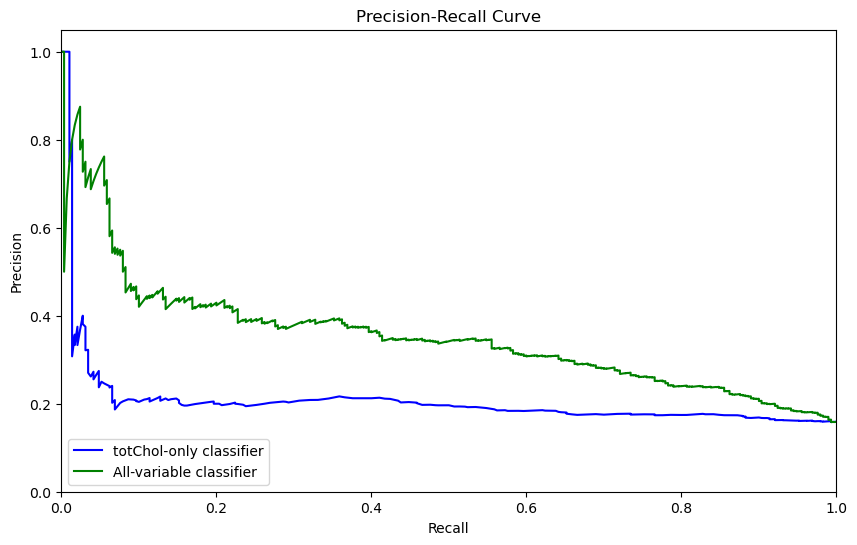

In [72]:
# PRC for all-variable classifier

ytest_prob_all = classifier_full.predict_proba(Xtest)[:, 1]
precision_all, recall_all, _ = precision_recall_curve(ytest, ytest_prob_all)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 6))
plt.plot(recall_totChol, precision_totChol, color='blue', label='totChol-only classifier')
plt.plot(recall_all, precision_all, color='green', label='All-variable classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.legend(loc='lower left')
plt.show()